# The $t$-Test

The 1 sample $t$-test compares a sample mean to the population mean.

## Example: Sleep

A simple random sample of 35 University of North Georgia students were asked the total sleep they had received in the last 48 hours including naps. The answers they gave were then divided by 2 to estimate how much sleep per night that they receive on average. Test at the $\alpha = 0.05$ level wether these students receive, on average, less than 7 hours of sleep each night. The data are given below.

<table style="width:75%">
<tr>
  <td>7.5</td><td>3</td><td>3</td><td>6</td><td>7.5</td><td>8</td><td>6</td>
</tr><tr>
  <td>8.5</td><td>6</td><td>8</td><td>8.5</td><td>10</td><td>7</td><td>7</td>
</tr><tr>
  <td>6.5</td><td>7.5</td><td>5</td><td>4</td><td>5</td><td>8.5</td><td>5</td>
</tr><tr>
    <td>6</td><td>7</td><td>5.5</td><td>4</td><td>8.5</td><td>6</td><td>11</td>
</tr><tr>
    <td>8.5</td><td>5</td><td>7</td><td>10</td><td>7.5</td><td>3.5</td><td>7</td>
</tr>
</table>

We first need to create a vector in R for these data which is shown below. The vector is given the name **sleep**.

In [1]:
sleep <- c(7.5, 3, 3, 6, 7.5, 8, 6, 8.5, 6, 8, 8.5, 10, 7, 7, 6.5, 7.5, 5, 4, 5, 8.5, 5, 6, 7, 5.5, 4, 8.5, 6, 11, 8.5, 5, 7, 10, 7.5, 3.5, 7)

```{dropdown} Tip for Calculating Statistics "By-Hand"
We are allowed, when using a $t$ table and formulas to conduct the test "by hand," to still use machine-produced descriptive statistics.
```

Let's first quickly grab the standard descriptive statistics for the *sleep* vector. This will help later when we conduct the by-hand calculations.

In [2]:
m = mean(sleep)   # Average
s = sd(sleep)     # Standard Deviation
n = length(sleep) # Sample Size
cat('The summary statistics are as follows: \nmean = ',m,'\nstandard deviation = ',s,'\nwith sample size = ',n)

The summary statistics are as follows: 
mean =  6.685714 
standard deviation =  1.959463 
with sample size =  35

## Hypotheses

The null hypothesis states that the overall mean for UNG students is 7 hours of sleep. The researchers believe the mean is lower than that. Thus, in mathematical symbols, we have the following:

$$\begin{align}H_0 &: \mu = 7 \\ H_a &: \mu < 7\end{align}$$

## Verification

```{sidebar} **Warning**
Verification of the $t$-test assumptions is difficult to accomplish without technology.
```

Recalling that the assumptions for a $t$-test are *normality*, *independence*, and *homogeneity of the variances*, we will check **normality** first using a density plot and a QQ plot.

### Normality and the QQ Plot

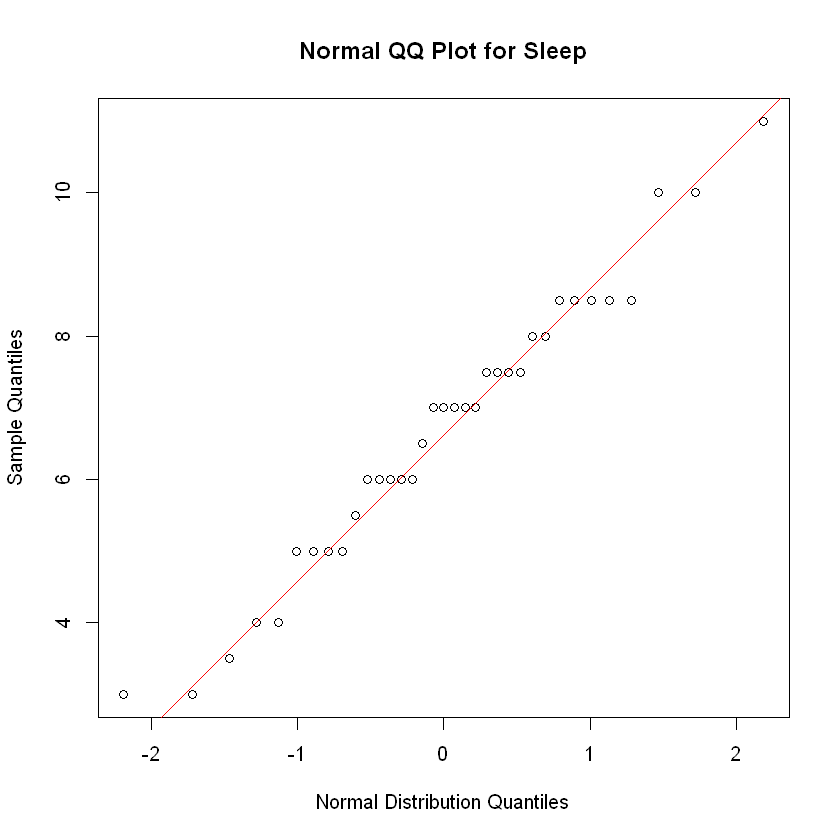

In [3]:
qqnorm(sleep, 
       xlab = 'Normal Distribution Quantiles' , 
       ylab = 'Sample Quantiles' ,
       main = 'Normal QQ Plot for Sleep')
qqline(sleep, col = 'red')

**Analysis.** The discrete nature of the responses leaves a stair step pattern to the quantiles. However, despite this awkwared look, the red line is a very good fit for the data. Hence, we have solid evidence the data are normally distributed.

### Normality and the Density Plot

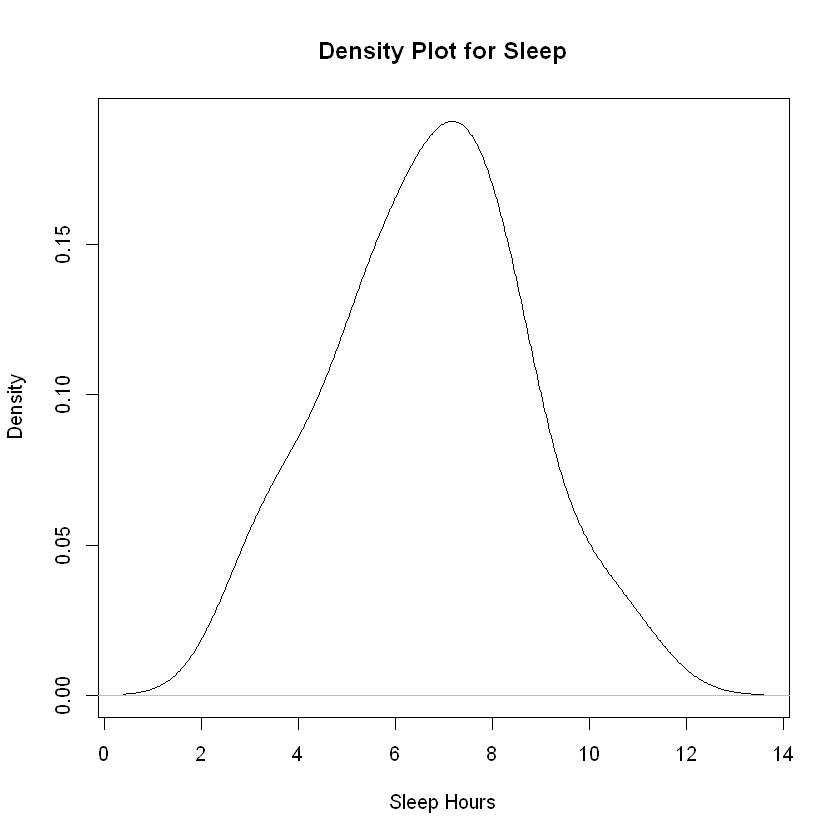

In [4]:
plot(density(sleep), main = 'Density Plot for Sleep', xlab = 'Sleep Hours')

**Analysis.** The density plot is not perfectly normal, but the bell-shape is easy enough to confirm that these data are quite likely to be drawn from a normal distribution.

### Homogeneity of the Variances

We've checked the *normality* assumption and cannot check statistically for *independence*. We must verify the homogeneity of the variances assumption is satisfied. 
```{warning}
Be careful. With small sample sizes of $n\leq 40$, outliers can have a severe impact on accuracy.
```
The sample size is reasonable with $n=35$, and no outliers exist in the sample data:

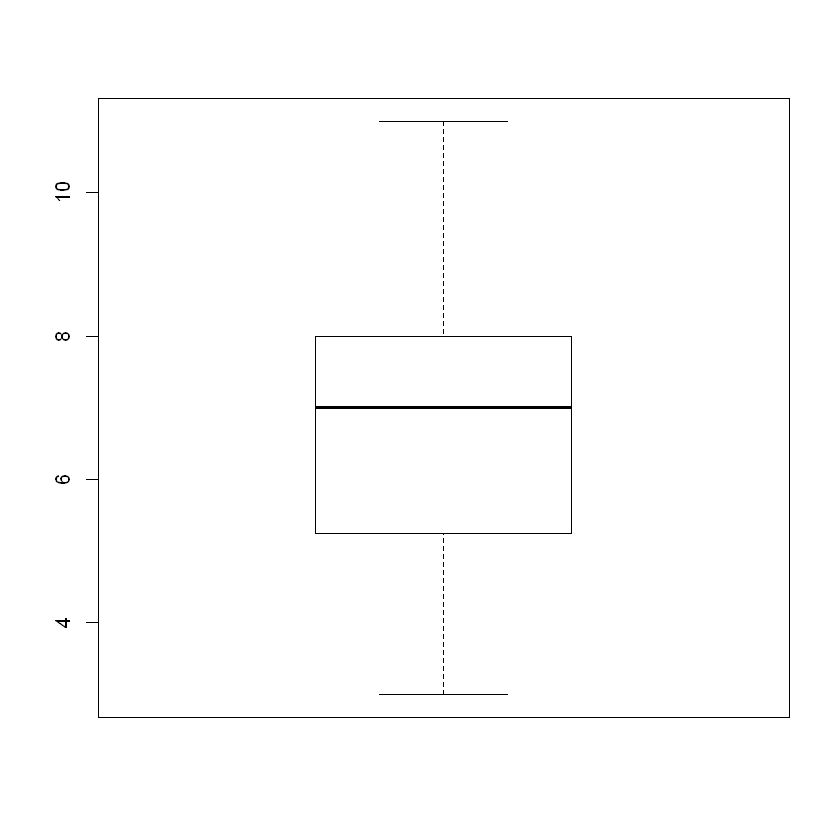

In [5]:
boxplot(sleep)

Thus, our verification is complete. These data are appropriate for $t$ procedures.

## Conducting the $t$-Test in R

R needs to know how to determine the null and alternative hypotheses. Hence, we indicate that the null hypothesis includes the overal population mean of $m_0 = 7$. We also indicate the alternative is $\mu<7$ by specifying the 'less than' inequality.

In [6]:
t.test(sleep, alternative = 'less', mu = 7)


	One Sample t-test

data:  sleep
t = -0.9489, df = 34, p-value = 0.1747
alternative hypothesis: true mean is less than 7
95 percent confidence interval:
     -Inf 7.245765
sample estimates:
mean of x 
 6.685714 


## Reporting Out

Because $p = 0.1747 < 0.05 = \alpha$, we fail to reject the null hypothesis. Thus, we find no evidence indicating that the average sleep for these students is less than 7 hours.

Admittedly, we calculated the average sleep to be 6.7 hours which shows that the average is slightly less than 7 hours. However, the difference is **not statistically significant**. For scientific research purposes, we have no evidence the average sleep hours is less than 7.

## By Hand Calculations

Let's link to the

  - [formula sheet for the class](https://faculty.ung.edu/rsinn/3350/StatsFormulas.pdf) and to
  - [the $t$-table](https://faculty.ung.edu/rsinn/3350/Table_T.pdf)

Reminding ourselves of the standard descriptives (copied from above):

In [7]:
cat('The summary statistics are as follows: \nmean = ',m,'\nstandard deviation = ',s,'\nwith sample size = ',n)

The summary statistics are as follows: 
mean =  6.685714 
standard deviation =  1.959463 
with sample size =  35

```{sidebar} Degrees of Freedom
The degrees of freedom for the 1 sample $t$-test are one less than the sample size, or $df=n-1$.
```
We calculate the test statistic given that:

$$\begin{align}t &= \frac{\bar x - \mu_0}{\frac{s}{\sqrt{n}}}\\
&= \frac{6.686 - 7}{\frac{1.959}{\sqrt{35}}}\\
&= \frac{-0.314}{\frac{1.959}{5.916}}\\
&\approx -0.9483
\end{align}$$

We look up the correct value for $t^*$ in the $t$-table given that we have a 1-tailed hypothesis and $df = 34$. We find that the correct value is as follows:

$$t^* = 1.697$$

with 34 degrees of freedom (or $df=30$ in the table) and $\alpha = 0.05$.

### Reporting Out

The graphic below shows the relationship between the test statistic $|t|$ and the cutoff value from table $t^*$. We draw a vertical line at $t^*$ and shade beyond it. Thus, if the absolute value of the calculated test statistic is greater than the cutoff value $t^*$, we **reject the null**.

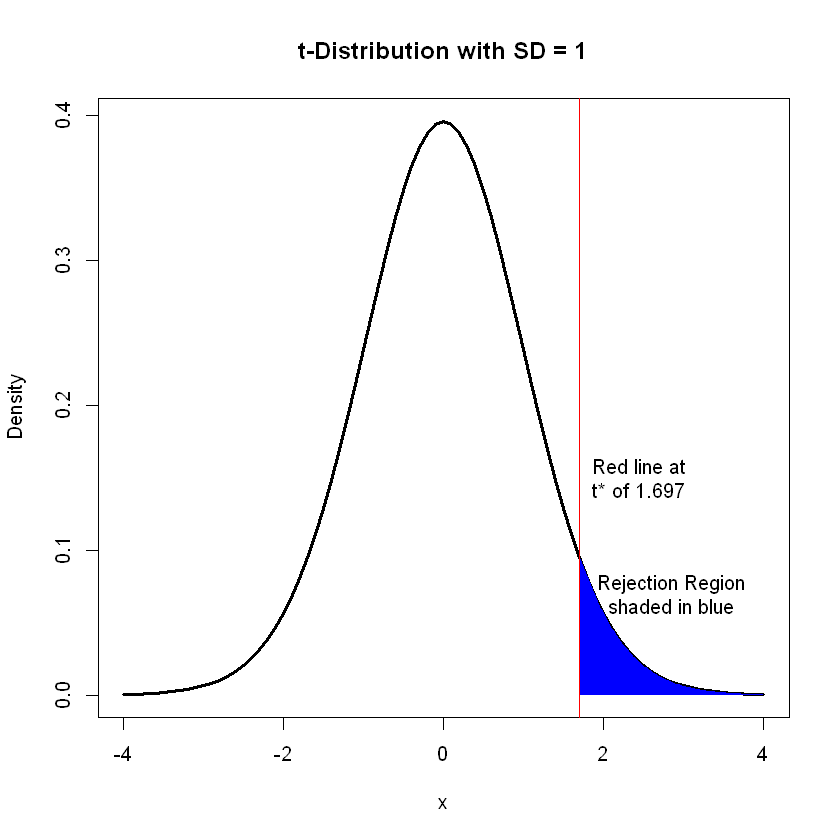

In [8]:
x <- seq(-4, 4, by = 0.1)
y <- dt(x, df = 34)
plot(x, y, type = "l", lwd = 3, main = "t-Distribution with SD = 1", xlab = "x", ylab = "Density")

x_r <- seq(1.96, 4, length.out = 75)
y_r <- dt(x_r, df = 34)
polygon(c(x_r, 1.697, 1.697), c(y_r, 0, dt(1.697, df = 34)), col = "blue", border = NA)

abline(v=1.697, col = 'red')# untf = FALSE,)
text(2.44, 0.15, 'Red line at\nt* of 1.697')
text(2.85, 0.07, 'Rejection Region\nshaded in blue')

Since $|t| = 0.9483 < 1.697 = t^*$, we fail to reject the null hypothesis. As above, we find no evidence that the sleep hours for UNG students is less than 7 hours.